In [1]:
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('results.pickle', 'rb') as handle:
    results = pickle.load(handle)

In [3]:
i=0

In [4]:
i+=1
results[i]

{'first_text': ('I mention this option first because if your reporting system is critical, you probably want to invest in a reliable monitoring system long term. Short term you could do some custom scripting if you wanted to go the Windows Log route.\n',),
 'second_text': ('For most production instances, you want to have an enterprise monitoring tool which will scan for OS and SQL related errors. Typically you set your Sql Agent jobs to write to the Windows event log when they fail, and your monitoring tool frequently reads the Windows event log and will alert you based on conditions you define. You can purchase a monitoring system such as SiteScope, or create your own tool to look for these errors. You could also use a tool like Logparser to read these logs.\n',),
 'label': 0,
 '0': 0.6236132979393005,
 '1': 0.3763866424560547}

In [5]:
positive_samples = []
negative_samples = []

for k, v in results.items():
    if v['label'] == 1:
        positive_samples.append((k, v[str(1)]))
    else:
        negative_samples.append((k, v[str(0)]))

In [6]:
len(positive_samples), len(negative_samples)

(7529, 6461)

In [7]:
cls_pos = {10:[],20:[],30:[],40:[],50:[],60:[],70:[],80:[],90:[],100:[]}
for sample in positive_samples:
    
    v = sample[1]*100
    for k in cls_pos.keys():
        if v < k:
            cls_pos[k].append((sample))
            break
        
for k, v in cls_pos.items():
    print(k, len(v))

10 72
20 241
30 345
40 452
50 667
60 778
70 741
80 1092
90 1171
100 1970


In [8]:
cls_neg = {10:[],20:[],30:[],40:[],50:[],60:[],70:[],80:[],90:[],100:[]}
for sample in negative_samples:
    
    v = sample[1]*100
    for k in cls_neg.keys():
        if v < k:
            cls_neg[k].append((sample))
            break
l_k = []
l_v = []
for k, v in cls_neg.items():
    print(k, len(v))
    l_k.append(k)
    l_v.append(len(v))

10 77
20 184
30 314
40 327
50 513
60 691
70 672
80 755
90 1132
100 1796


In [9]:
sns.set_theme(style='whitegrid')

Text(0.5, 0, 'Confidence')

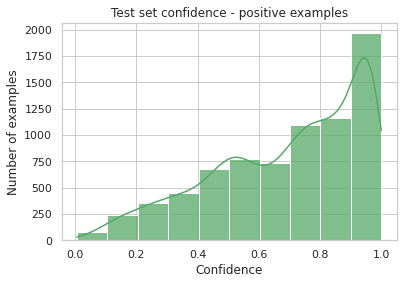

In [10]:
x_p = np.array([p[1] for p in positive_samples])
histplot = sns.histplot(x_p, bins=10, kde=True, color='g', alpha=0.75)
histplot.set_title('Test set confidence - positive examples')
histplot.set_ylabel('Number of examples')
histplot.set_xlabel('Confidence')

Text(0.5, 0, 'Probability of correct label')

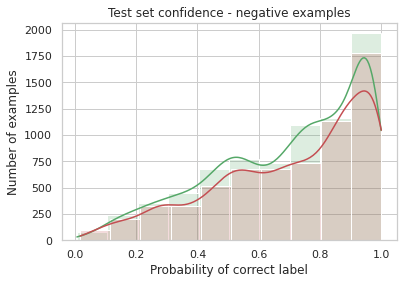

In [11]:
x_n = np.array([n[1] for n in negative_samples])
histplot_neg = sns.histplot(x_p, bins=10, kde=True, color=['g'], alpha=0.2)
sns.histplot(x_n, bins=10, kde=True, color=['r'], alpha=0.2 ,ax=histplot_neg)
histplot_neg.set_title('Test set confidence - negative examples')
histplot_neg.set_ylabel('Number of examples')
histplot_neg.set_xlabel('Probability of correct label')

In [163]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches((11,3.5))
fig.subplots_adjust(wspace=0.35)

x_n = np.array([n[1] for n in negative_samples])
histplot_neg = sns.histplot(x_n, bins=10, kde=True, color='r', ax=axes[0], alpha=0.75)
histplot_neg.set_title('Test set confidence - negative examples')
histplot_neg.set_ylabel('Number of examples')
histplot_neg.set_xlabel('Confidence')

x_p = np.array([p[1] for p in positive_samples])
histplot_pos = sns.histplot(x_p, bins=10, kde=True, color='g', ax=axes[1], alpha=0.75)
histplot_pos.set_title('Test set confidence - positive examples')
histplot_pos.set_ylabel('Number of examples')
histplot_pos.set_xlabel('Confidence')

plt.show()

In [13]:
cls_100 = cls_pos[100]
cls_neg_100 = cls_neg[100]

In [14]:
qm = 0
dct_pos_100 = {'ft':[], 'st':[], 'conf':[]}
for ind, conf in cls_100:
    dct_pos_100['ft'].append(results[ind]['first_text'][0])
    dct_pos_100['st'].append(results[ind]['second_text'][0])
    dct_pos_100['conf'].append(conf)
    
    if ('?' in results[ind]['first_text'][0] or '?' in results[ind]['second_text'][0]):
        qm+=1
        
print(qm)

709


In [26]:
qm = 0
dct_neg_100 = {'ft':[], 'st':[], 'conf':[]}
for ind, conf in cls_neg_100:
    dct_neg_100['ft'].append(results[ind]['first_text'][0])
    dct_neg_100['st'].append(results[ind]['second_text'][0])
    dct_neg_100['conf'].append(conf)
    
    if ('?' in results[ind]['first_text'][0] and '?' not in results[ind]['second_text'][0]) or ('?' not in results[ind]['first_text'][0] and '?' in results[ind]['second_text'][0]):
        qm+=1
print(qm)

420


In [27]:
import pandas as pd

In [28]:
df_pos_100 = pd.DataFrame.from_dict(dct_pos_100)
df_neg_100 = pd.DataFrame.from_dict(dct_neg_100)

In [29]:
len(df_pos_100), len(df_neg_100)

(1970, 1796)

In [30]:
cls_10 = cls_pos[10]
cls_neg_10 = cls_neg[10]

qm = 0
dct_pos_10 = {'ft':[], 'st':[], 'conf':[]}
for ind, conf in cls_10:
    dct_pos_10['ft'].append(results[ind]['first_text'][0])
    dct_pos_10['st'].append(results[ind]['second_text'][0])
    dct_pos_10['conf'].append(conf)
    
    if ('?' in results[ind]['first_text'][0] and '?' not in results[ind]['second_text'][0]) or ('?' not in results[ind]['first_text'][0] and '?' in results[ind]['second_text'][0]):
        qm+=1
        
print(qm)

qm = 0
dct_neg_10 = {'ft':[], 'st':[], 'conf':[]}
for ind, conf in cls_neg_10:
    dct_neg_10['ft'].append(results[ind]['first_text'][0])
    dct_neg_10['st'].append(results[ind]['second_text'][0])
    dct_neg_10['conf'].append(conf)
    
    if ('?' in results[ind]['first_text'][0] and '?' not in results[ind]['second_text'][0]) or ('?' not in results[ind]['first_text'][0] and '?' in results[ind]['second_text'][0]):
        qm+=1
print(qm)

13
16


In [31]:
df_pos_10 = pd.DataFrame.from_dict(dct_pos_10)
df_neg_10 = pd.DataFrame.from_dict(dct_neg_10)

In [32]:
len(df_pos_10), len(df_neg_10)

(72, 77)

In [33]:
df_pos_100.to_csv('high_confidence_positives.csv')
df_pos_10.to_csv('low_confidence_positives.csv')
df_neg_100.to_csv('high_confidence_negatives.csv')
df_neg_10.to_csv('low_confidence_negatives.csv')

In [118]:
i=0

In [66]:
i+=3
df_pos_100['ft'][i],df_pos_100['st'][i],df_pos_100['conf'][i]

('If your PXE server is also your DHCP server then you can add some BASH script lines for automatically defining the variable value from the DHCP server IP address avoiding this way the needed manual definition.\n',
 'I already have a pxeboot server set up on the same server that stores the auditing software, and have set the variable properly in the audit script itself.. Can someone clarify what this might look like within the DHCP.conf file? the Open Audit software is stored in /var/www/html on a LAMP stack\n',
 0.9725756645202637)

In [98]:
i+=3
df_neg_100['ft'][i],df_neg_100['st'][i],df_neg_100['conf'][i]

('for now there are only server-side certificates involved (eg the client knows the server is really the server).\n',
 'Ideally I would like to be able to hand out and install client certificates almost unnoticed and refresh them every now and then (eg they expire every week).\n',
 0.9166427850723267)

In [117]:
i+=1
df_pos_10['ft'][i],df_pos_10['st'][i],df_pos_10['conf'][i]

('I too had the exact same problem, while senselessly cleaning dust off the touchscreen.  None of the buttons worked right, and I could not get it fixed.  Ended up downloading the updated firmware from the HP website (for my exact printer/operating system) and presto! the "Start Calibration" button appeared under the system tab of the "HP Device Toolbox" (similar to others\' "HP Solution Center") and worked perfectly as stated by other posters.  Thanks so much to everyone for helping with posts and suggestions!!\n',
 "To confirm, I also updated my firmware then used the calibration feature on the printer's web page and it worked! Finally, I don't know if it worked because I updated the firmware or because I used the calibration feature afterward. I didn't check to see if it just needed a firmware update before calibrating it. Regardless, thanks to everyone for their posts and suggestions. Worked like a charm.\n",
 0.029605863615870476)

In [144]:
i+=1
df_neg_10['ft'][i],df_neg_10['st'][i],df_neg_10['conf'][i]

("One other random potential issue:  Sometimes my apps just don't work on Win7x64 unless they're running as Admin.  Even if I launch them under an account that has admin privs, I still occasionally have to right click on them and run them as administrator.  Perhaps...\n",
 "You said the ports on the server were open.  I'm assuming you have tested this.  Try a netstat -an on the server just to be certain that it's actually listening on those ports.",
 0.09493175894021988)